Task 01 - Data Preprocessing and Visualization

In [634]:
# Installing the required libraries
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [635]:
# Importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
BLUE = "\033[94m"

In [636]:
column_names = ["HCHO_reading", "Location", "Start_Date", "End_Date"]

# Importing the 3 CSV files into pandas
col_mat_nuw_df = pd.read_csv("Datasets/Stage_01/col_mat_nuw_output.csv", names=column_names, parse_dates=["Start_Date", "End_Date"])
kandy_df = pd.read_csv("Datasets/Stage_01/kan_output.csv", names=column_names, parse_dates=["Start_Date", "End_Date"])
mon_kur_jaf_df = pd.read_csv("Datasets/Stage_01/mon_kur_jaf_output.csv", names=column_names, parse_dates=["Start_Date", "End_Date"])

# Creating a seperate data frame for each district
colombo_df = col_mat_nuw_df[col_mat_nuw_df["Location"] == "Colombo Proper"]
matara_df = col_mat_nuw_df[col_mat_nuw_df["Location"] == "Deniyaya, Matara"]
nuwaraeliya_df = col_mat_nuw_df[col_mat_nuw_df["Location"] == "Nuwara Eliya Proper"]
monaragala_df = mon_kur_jaf_df[mon_kur_jaf_df["Location"] == "Bibile, Monaragala"]
kurunegala_df = mon_kur_jaf_df[mon_kur_jaf_df["Location"] == "Kurunegala Proper"]
jaffna_df = mon_kur_jaf_df[mon_kur_jaf_df["Location"] == "Jaffna Proper"]

In [637]:
# Adding all the seperated data frames into a list to visualise and preprocess
df_list = [colombo_df, matara_df, nuwaraeliya_df, monaragala_df, kurunegala_df, jaffna_df, kandy_df]

for dataframe in df_list:
    print(BLUE, dataframe.iloc[0, 1], RESET)
    dataframe.info()
    print("")

 Colombo Proper 
<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO_reading  1339 non-null   float64       
 1   Location      1826 non-null   object        
 2   Start_Date    1826 non-null   datetime64[ns]
 3   End_Date      1826 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.3+ KB

 Deniyaya, Matara 
<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 1826 to 3651
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO_reading  979 non-null    float64       
 1   Location      1826 non-null   object        
 2   Start_Date    1826 non-null   datetime64[ns]
 3   End_Date      1826 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.3+ KB

 Nuwara Eliya

In [638]:
# Identifying the negative values for density
for dataframe in df_list:
    negative_count = 0
    for index, row in dataframe.iterrows():
        if row["HCHO_reading"] < 0:
            negative_count +=1
        else:
            continue
    if negative_count > 0:
        print(RED, "The", dataframe.iloc[0, 1], "datarame contains", negative_count, "negative values.", RESET)
    else:
        print(GREEN, "The", dataframe.iloc[0, 1], "datarame contains no negative values.", RESET)

 The Colombo Proper datarame contains 52 negative values. 
 The Deniyaya, Matara datarame contains 115 negative values. 
 The Nuwara Eliya Proper datarame contains 96 negative values. 
 The Bibile, Monaragala datarame contains 79 negative values. 
 The Kurunegala Proper datarame contains 56 negative values. 
 The Jaffna Proper datarame contains 57 negative values. 
 The Kandy Proper datarame contains 108 negative values. 


In [639]:
# Dealing with the negative values present in the dataset since density cannot be negative
for dataframe in df_list:
    dataframe.loc[:, 'HCHO_reading'] = np.where(dataframe['HCHO_reading'] < 0, np.nan, dataframe['HCHO_reading'])


In [640]:
# Identifying the negative values for density
for dataframe in df_list:
    negative_count = 0
    for index, row in dataframe.iterrows():
        if row["HCHO_reading"] < 0:
            negative_count +=1
        else:
            continue
    if negative_count > 0:
        print(RED, "The", dataframe.iloc[0, 1], "datarame contains", negative_count, "negative values.", RESET)
    else:
        print(GREEN, "The", dataframe.iloc[0, 1], "datarame contains no negative values.", RESET)

 The Colombo Proper datarame contains no negative values. 
 The Deniyaya, Matara datarame contains no negative values. 
 The Nuwara Eliya Proper datarame contains no negative values. 
 The Bibile, Monaragala datarame contains no negative values. 
 The Kurunegala Proper datarame contains no negative values. 
 The Jaffna Proper datarame contains no negative values. 
 The Kandy Proper datarame contains no negative values. 


In [641]:
# Using linear interpolation to impute the missing values since this is time series data
for dataframe in df_list:
    dataframe.loc[:, "HCHO_reading"] = dataframe["HCHO_reading"].interpolate(method="linear")


In [642]:
# Printing the data that is still missing after interpolation
for dataframe in df_list:
    missing_rows = dataframe[dataframe.isnull().any(axis=1)]
    if missing_rows.size > 0:
        print(RED, dataframe.iloc[0, 1], RESET)
        print(missing_rows)
        print("")
    else:
        print(GREEN, dataframe.iloc[0, 1], "has no missing values\n", RESET )


 Colombo Proper has no missing values
 
 Deniyaya, Matara 
      HCHO_reading          Location Start_Date   End_Date
1826           NaN  Deniyaya, Matara 2019-01-01 2019-01-02

 Nuwara Eliya Proper 
      HCHO_reading             Location Start_Date   End_Date
3652           NaN  Nuwara Eliya Proper 2019-01-01 2019-01-02
3653           NaN  Nuwara Eliya Proper 2019-01-02 2019-01-03

 Bibile, Monaragala 
   HCHO_reading            Location Start_Date   End_Date
0           NaN  Bibile, Monaragala 2019-01-01 2019-01-02

 Kurunegala Proper has no missing values
 
 Jaffna Proper has no missing values
 
 Kandy Proper has no missing values
 


In [643]:
"""Conclusion - Some data are still missing, where the first row of a dataset was empty, since linear interpolation takes
into account the data before and after the missing values and the first row has no data to consider before it. In one instance,
where the first and second rows are empty, the second row of data cannot be interpolated as well"""

# Using mean imputation for the missing values that weren"t fixed by interpolation
for dataframe in df_list:
    has_nan = dataframe["HCHO_reading"].isna().any()
    if has_nan:
        # Calculating the mean of the column containing missing values
        column_mean = dataframe["HCHO_reading"].mean()
        # Imputing the calculated mean of the column containing missing values
        dataframe.loc[:, "HCHO_reading"].fillna(column_mean, inplace=True)


/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/187750940.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/187750940.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [644]:
# Rechecking the data that is still missing
for dataframe in df_list:
    missing_rows = dataframe[dataframe.isnull().any(axis=1)]
    if missing_rows.size > 0:
        print(RED, dataframe.iloc[0, 1], RESET)
        print(missing_rows)
        print("")
    else:
        print(GREEN, dataframe.iloc[0, 1], "has no missing values", RESET )


 Colombo Proper has no missing values 
 Deniyaya, Matara has no missing values 
 Nuwara Eliya Proper has no missing values 
 Bibile, Monaragala has no missing values 
 Kurunegala Proper has no missing values 
 Jaffna Proper has no missing values 
 Kandy Proper has no missing values 


In [645]:
# CHECKING THE VALIDITY OF VALUES IN EACH DATA FRAME (DOMAIN SPECIFIC VALIDATIONS)
for dataframe in df_list:
    # Checking for duplicates in the data
    if dataframe[dataframe.duplicated()].size > 0:
        print(RED, "Duplicates exist in the", dataframe.iloc[0, 1], "dataframe", RESET)
    else:
        print(GREEN, "No duplicates exist in the", dataframe.iloc[0, 1], "dataframe", RESET)

    # Checking if any data of other locations exist in any dataframe
    unique_values = dataframe["Location"].unique()
    print(BLUE, "Unique values of the", dataframe.iloc[0, 1], "dataframe are", unique_values, RESET)

    # Checking if the time series data has been sorted by date
    if dataframe["Start_Date"].is_monotonic_increasing:
        print(GREEN, "Dates are sorted correctly in the", dataframe.iloc[0, 1], "dataframe", RESET)
    else:
        print(RED, "Dates are not sorted correctly in the", dataframe.iloc[0, 1], "dataframe", RESET)

    # Checking if each dataframe consists of all consecutive dates and if the starting and ending date for each row are valid
    num_rows = len(dataframe)
    is_data_consecutive = True

    for index in range(num_rows - 1):
        end_date_current = dataframe.iloc[index, 3]
        start_date_next = dataframe.iloc[index + 1, 2]

        if (end_date_current == start_date_next) and ((dataframe["End_Date"] - dataframe["Start_Date"] == pd.Timedelta(days=1)).all()):
            continue
        else:
            is_data_consecutive = False
            print(end_date_current, start_date_next)

    if is_data_consecutive:
        print(GREEN, "Dates are complete and consecutive in the", dataframe.iloc[0, 1], "dataframe", RESET)
    else:
        print(RED, "Dates are not complete and consecutive in the", dataframe.iloc[0, 1], "dataframe", RESET)

    print("")

 No duplicates exist in the Colombo Proper dataframe 
 Unique values of the Colombo Proper dataframe are ['Colombo Proper'] 
 Dates are sorted correctly in the Colombo Proper dataframe 
 Dates are complete and consecutive in the Colombo Proper dataframe 

 No duplicates exist in the Deniyaya, Matara dataframe 
 Unique values of the Deniyaya, Matara dataframe are ['Deniyaya, Matara'] 
 Dates are sorted correctly in the Deniyaya, Matara dataframe 
 Dates are complete and consecutive in the Deniyaya, Matara dataframe 

 No duplicates exist in the Nuwara Eliya Proper dataframe 
 Unique values of the Nuwara Eliya Proper dataframe are ['Nuwara Eliya Proper'] 
 Dates are sorted correctly in the Nuwara Eliya Proper dataframe 
 Dates are complete and consecutive in the Nuwara Eliya Proper dataframe 

 No duplicates exist in the Bibile, Monaragala dataframe 
 Unique values of the Bibile, Monaragala dataframe are ['Bibile, Monaragala'] 
 Dates are sorted correctly in the Bibile, Monaragala datafr

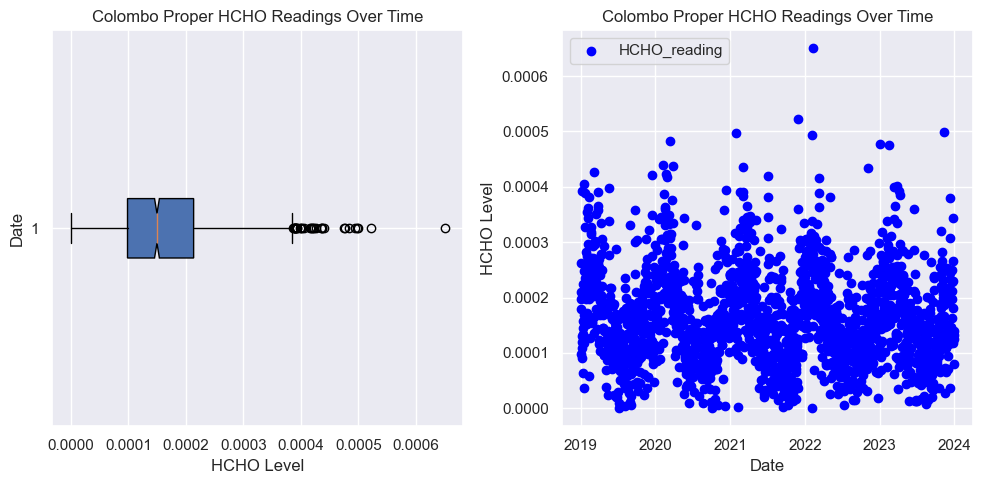

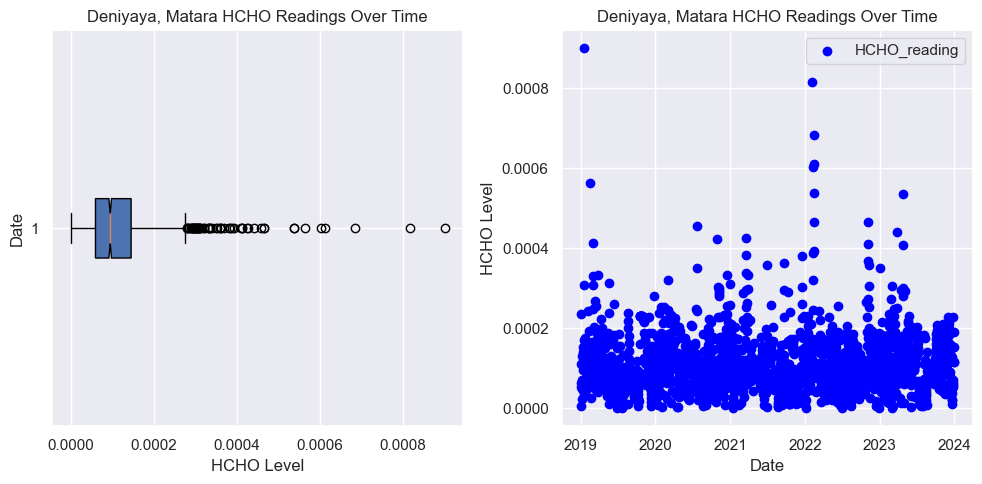

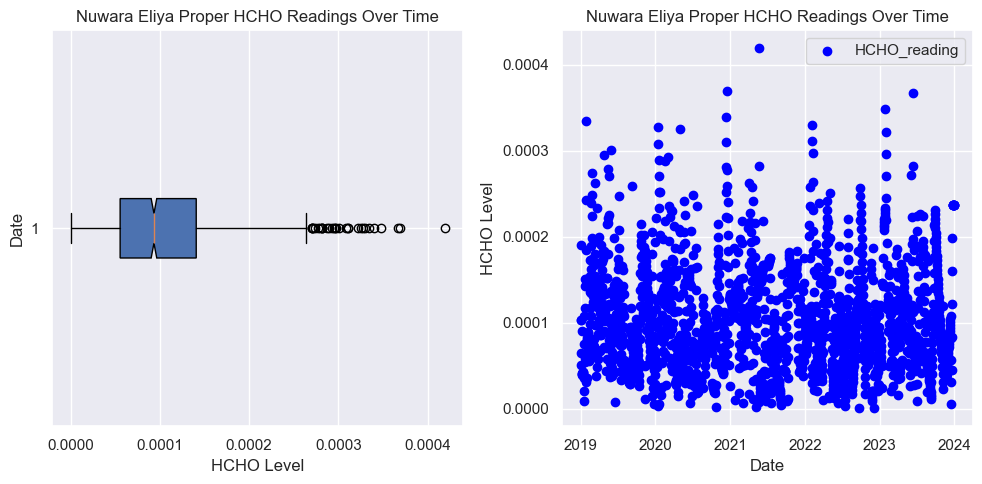

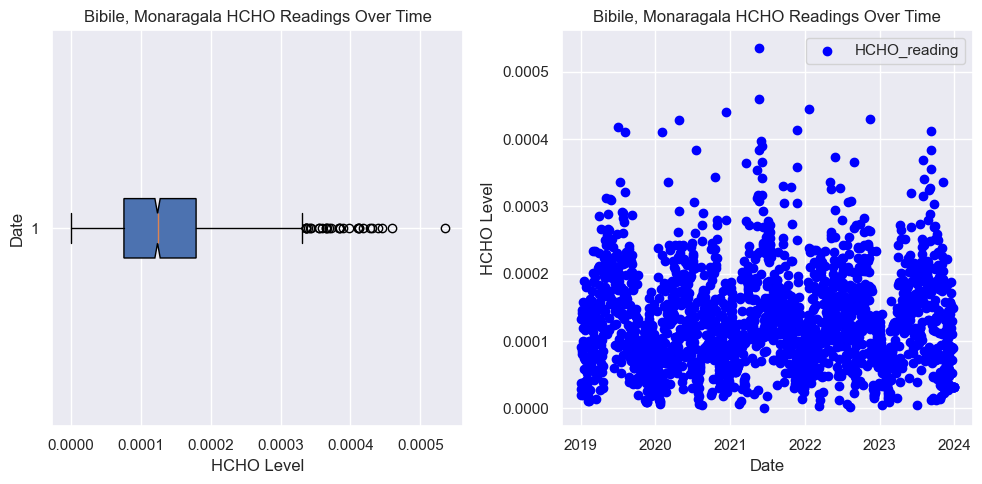

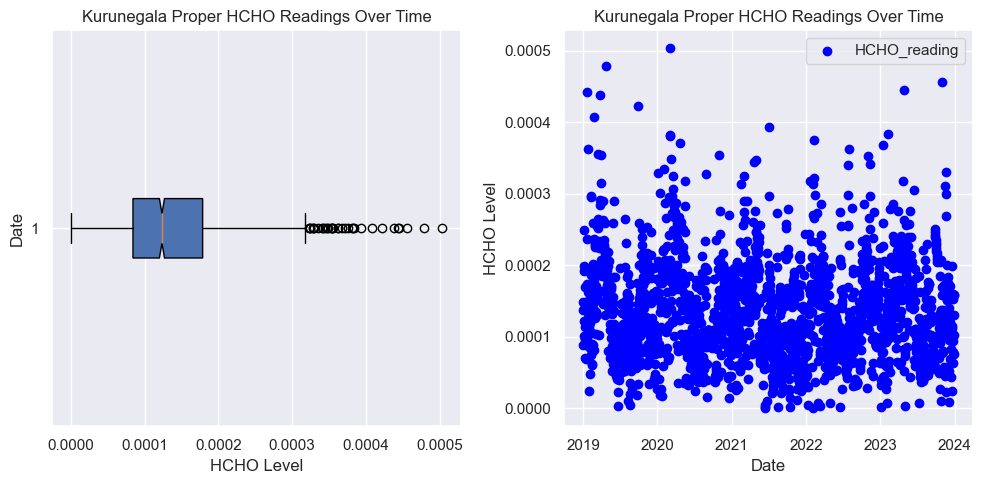

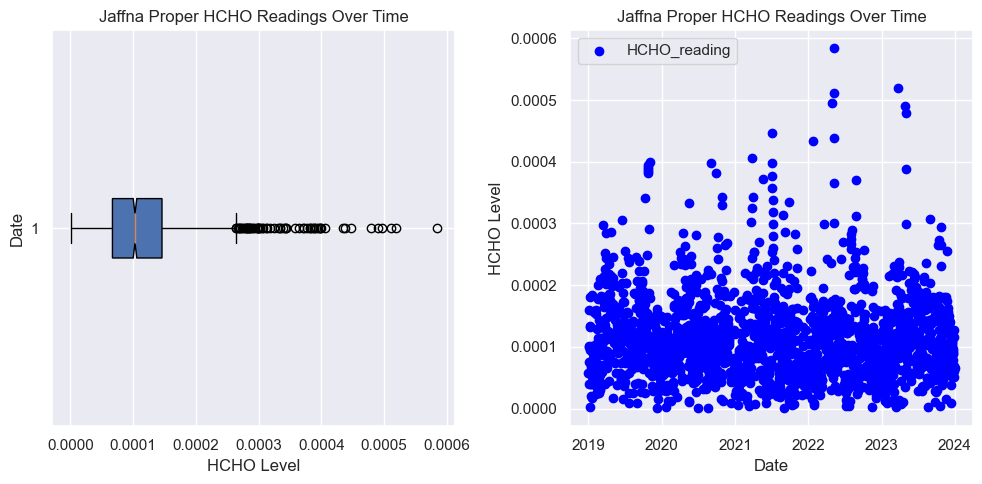

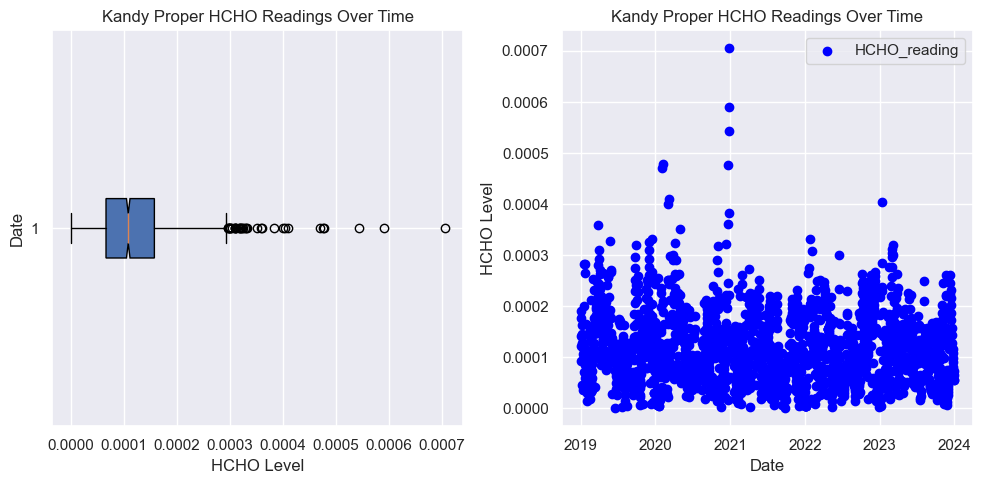

In [646]:
for dataframe in df_list:
    plt.figure(figsize=(10, 5))
    # Box plot
    plt.subplot(121)
    plt.boxplot(dataframe["HCHO_reading"], vert=False, patch_artist=True, showfliers=True, notch=True)
    title = dataframe.iloc[0, 1] + " HCHO Readings Over Time"
    plt.title(title)
    plt.xlabel("HCHO Level")
    plt.ylabel("Date")
    plt.grid(True)

    # Scatter plot
    plt.subplot(122)
    plt.scatter(dataframe["Start_Date"], dataframe["HCHO_reading"], color="blue", label="HCHO_reading")
    title = dataframe.iloc[0, 1] + " HCHO Readings Over Time"
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("HCHO Level")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/3602394859.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



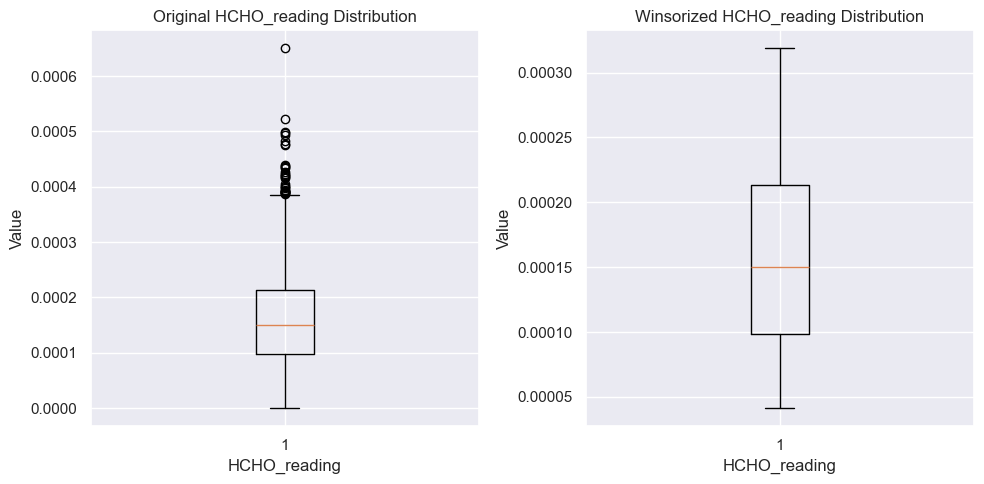

/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/3602394859.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



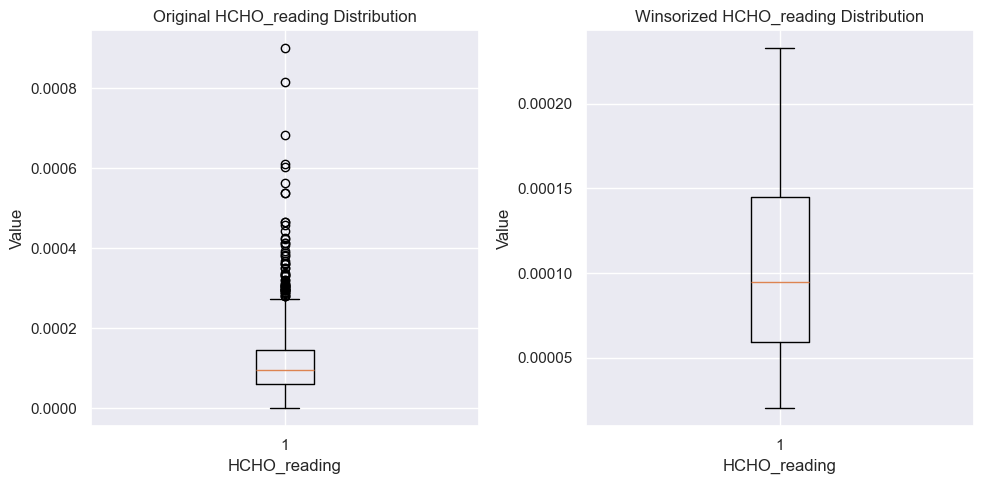

/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/3602394859.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



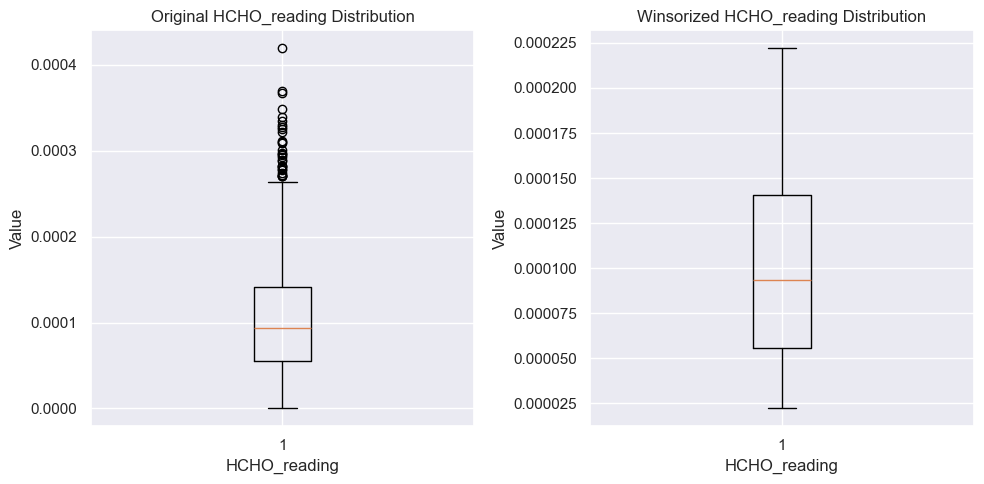

/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/3602394859.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



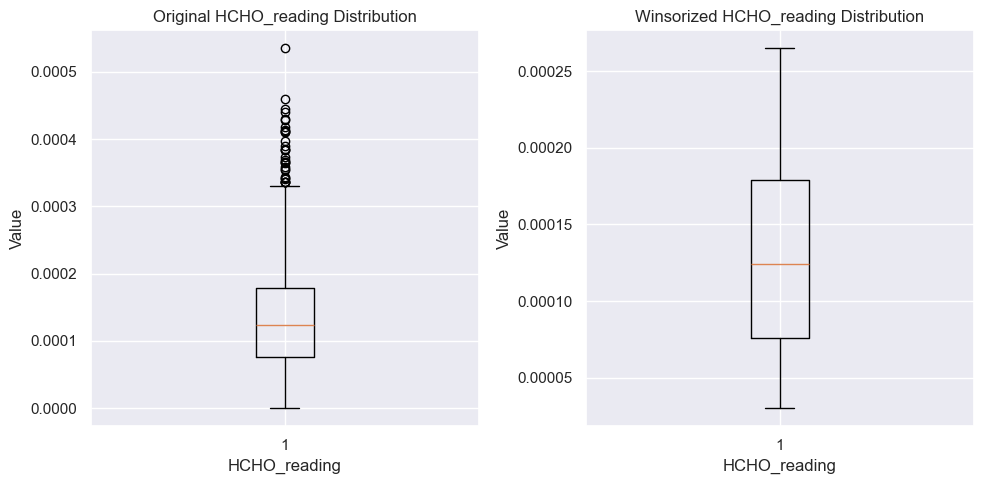

/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/3602394859.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



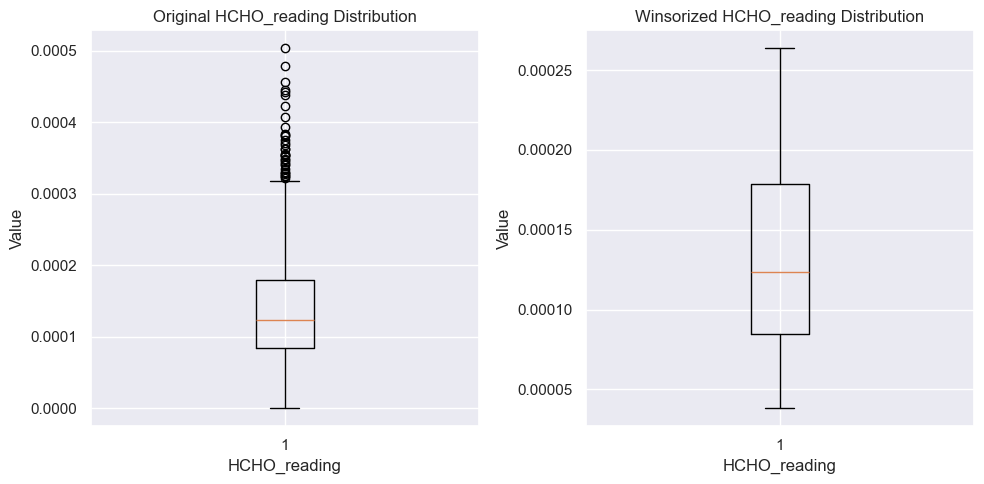

/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/3602394859.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



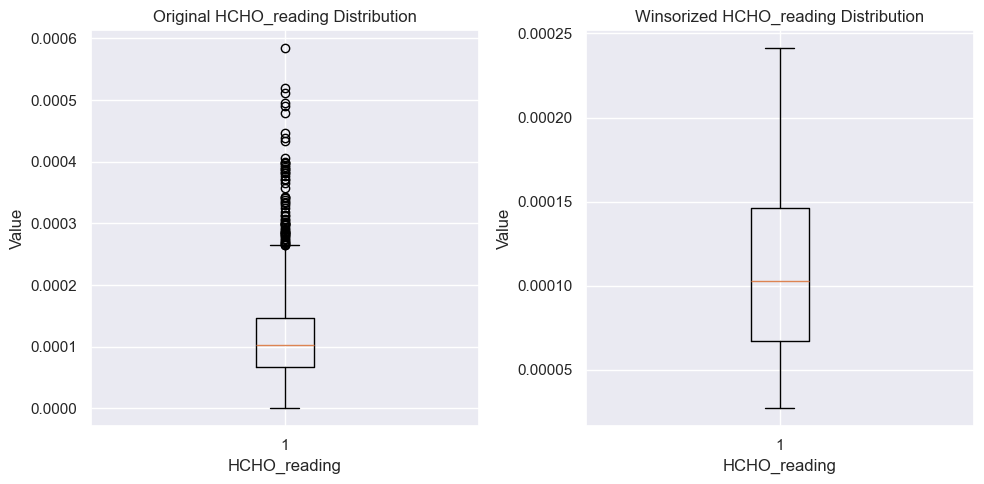

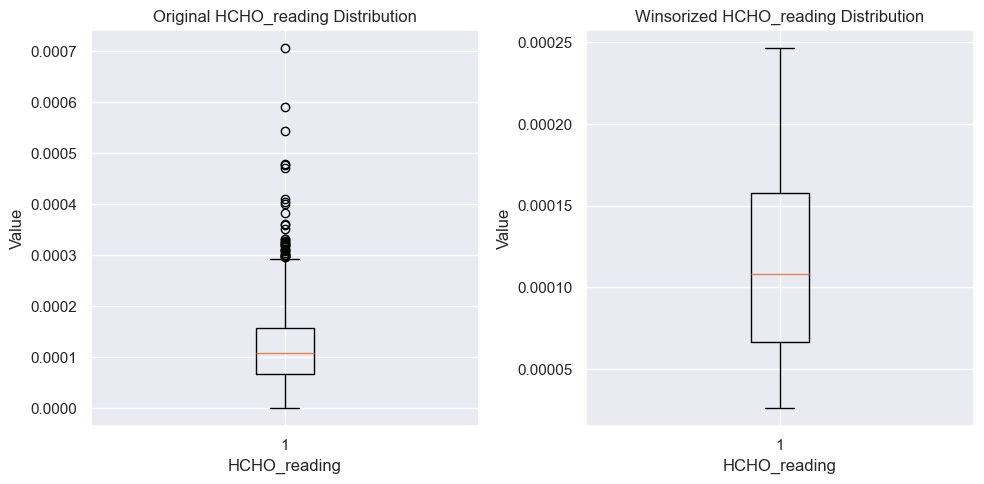

In [647]:
# Looping through each dataframe in the list
for dataframe in df_list:
    for column in dataframe.columns:
        if dataframe[column].dtype == 'float64':
            # Calculate the 5th and 95th percentiles
            percentiles = dataframe[column].quantile([0.05, 0.95])
            lower_threshold = percentiles.loc[0.05]
            upper_threshold = percentiles.loc[0.95]

            # Make a copy of the original column for plotting
            original_data = dataframe[column].copy()

            # Perform winsorization on the column and update it directly in the dataframe
            dataframe[column] = np.clip(dataframe[column], lower_threshold, upper_threshold)

            # Plotting the original and winsorized distributions
            plt.figure(figsize=(10, 5))

            plt.subplot(121)
            plt.boxplot(original_data, showfliers=True)
            plt.xlabel(column)
            plt.ylabel("Value")
            plt.title(f"Original {column} Distribution")
            plt.grid(True)

            plt.subplot(122)
            plt.boxplot(dataframe[column], showfliers=True)
            plt.xlabel(column)
            plt.ylabel("Value")
            plt.title(f"Winsorized {column} Distribution")
            plt.grid(True)

            plt.tight_layout()
            plt.show()


In [648]:
# Removing the remaining outliers using IQR
lower_percentile = 0.05
upper_percentile = 0.95

for i in range(len(df_list)):
    lower_threshold = df_list[i]["HCHO_reading"].quantile(lower_percentile)
    upper_threshold = df_list[i]["HCHO_reading"].quantile(upper_percentile)

    # Apply filtering directly within the list
    df_list[i] = df_list[i][
        (df_list[i]["HCHO_reading"] >= lower_threshold) & 
        (df_list[i]["HCHO_reading"] <= upper_threshold)
    ]

In [649]:
# Removing the remaining outliers using Z-score - This has been removed since it didn't make a difference
"""for dataframe in df_list:
    mean = dataframe["HCHO_reading"].mean()
    std = dataframe["HCHO_reading"].std()
    dataframe['Z_score'] = (dataframe["HCHO_reading"] - mean) / std
    filtered_dataframe = dataframe[(dataframe['Z_score'] > -3) & (dataframe['Z_score'] < 3)]
    filtered_dataframe = filtered_dataframe.drop(columns=['Z_score'])
    dataframe = filtered_dataframe"""

'for dataframe in df_list:\n    mean = dataframe["HCHO_reading"].mean()\n    std = dataframe["HCHO_reading"].std()\n    dataframe[\'Z_score\'] = (dataframe["HCHO_reading"] - mean) / std\n    filtered_dataframe = dataframe[(dataframe[\'Z_score\'] > -3) & (dataframe[\'Z_score\'] < 3)]\n    filtered_dataframe = filtered_dataframe.drop(columns=[\'Z_score\'])\n    dataframe = filtered_dataframe'

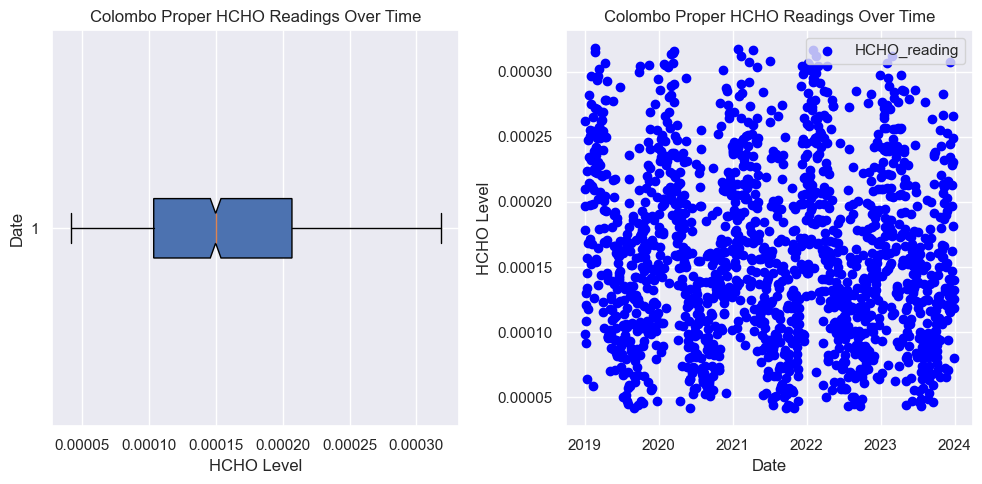

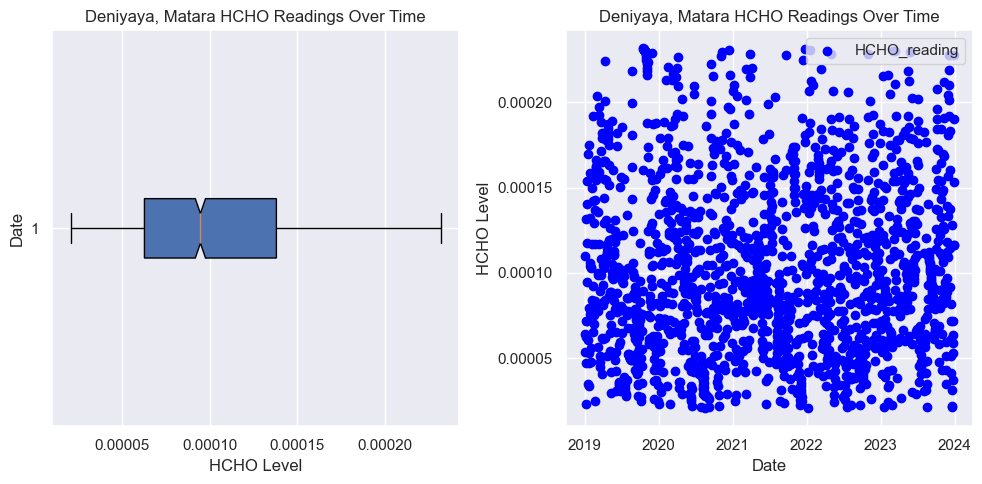

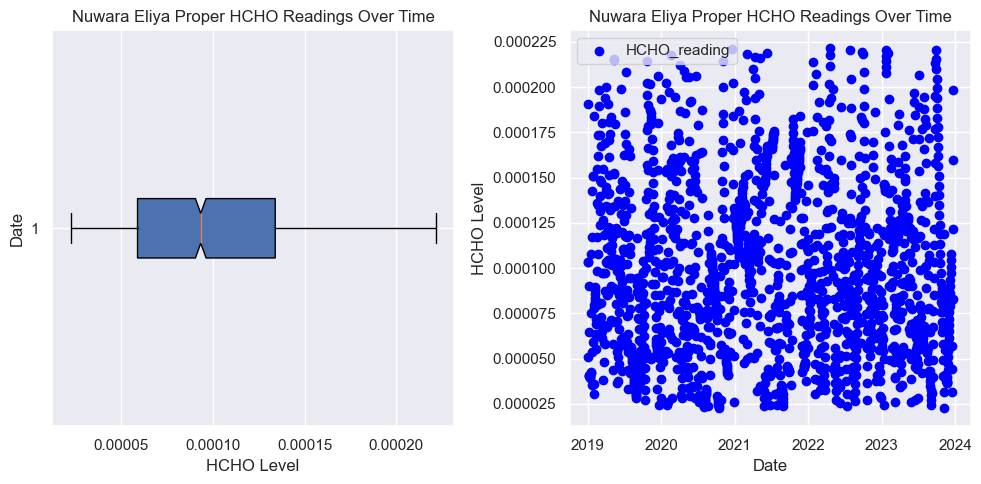

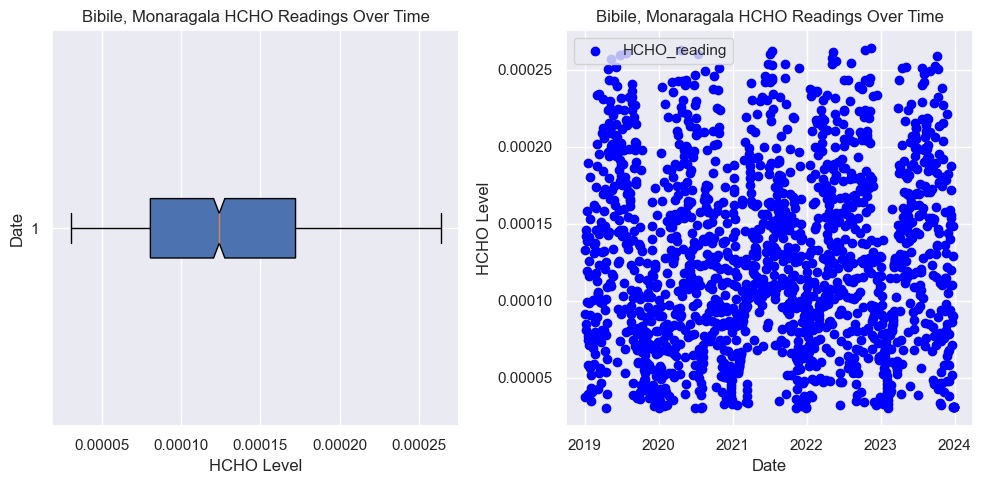

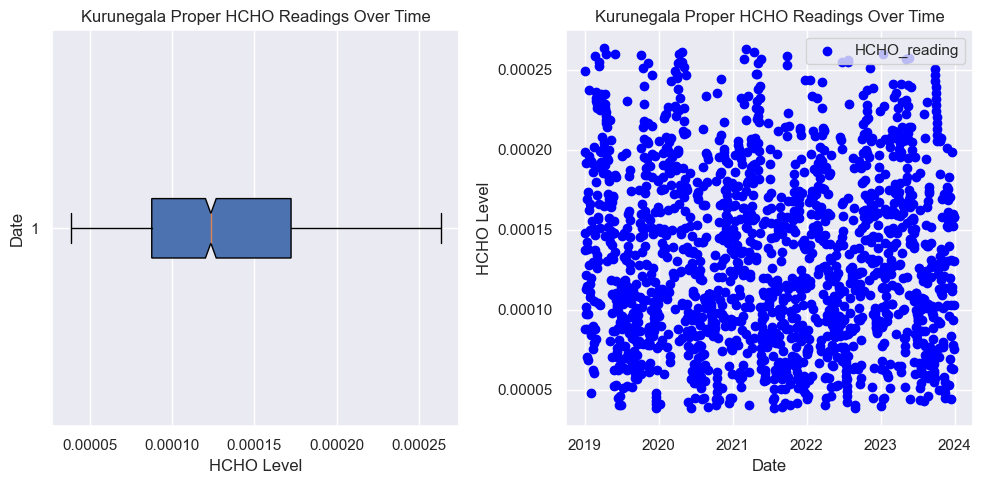

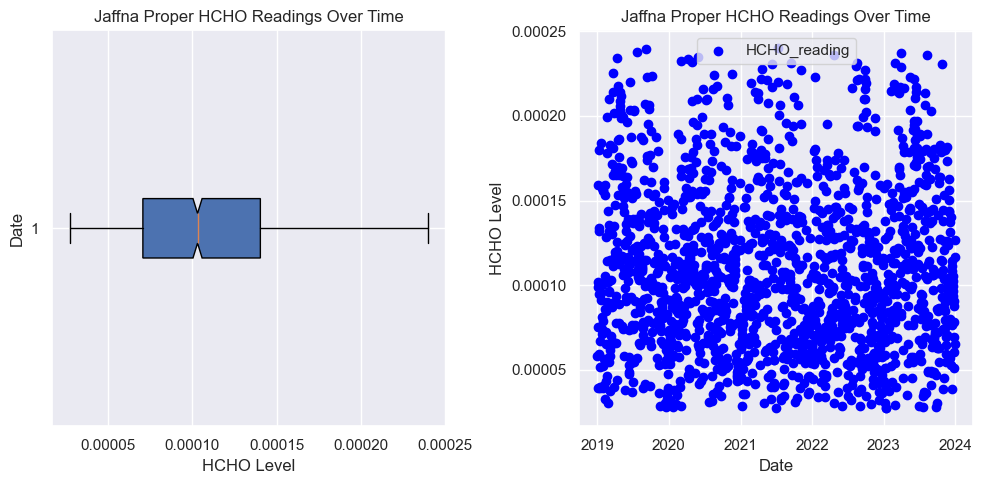

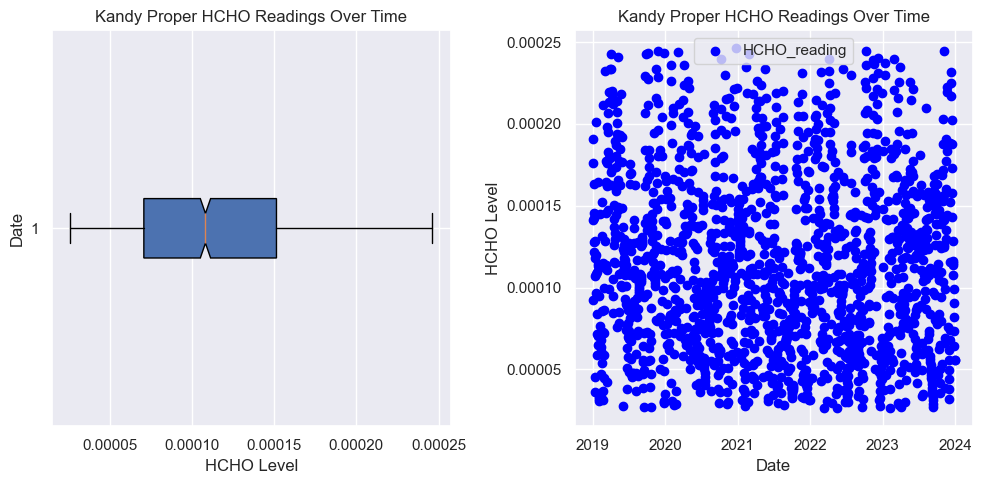

In [650]:
for dataframe in df_list:
    plt.figure(figsize=(10, 5))
    # Box plot
    plt.subplot(121)
    plt.boxplot(dataframe["HCHO_reading"], vert=False, patch_artist=True, showfliers=True, notch=True)
    title = dataframe.iloc[0, 1] + " HCHO Readings Over Time"
    plt.title(title)
    plt.xlabel("HCHO Level")
    plt.ylabel("Date")
    plt.grid(True)

    # Scatter plot
    plt.subplot(122)
    plt.scatter(dataframe["Start_Date"], dataframe["HCHO_reading"], color="blue", label="HCHO_reading")
    title = dataframe.iloc[0, 1] + " HCHO Readings Over Time"
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("HCHO Level")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [651]:
# Displaying information about each district
for dataframe in df_list:
    print(BLUE, "=======================", dataframe.iloc[0, 1], "=======================", RESET)
    print(BLUE, "Information", RESET)
    dataframe.info()
    print("")
    print(BLUE, "Descriptive Statistics", RESET)
    print(dataframe.describe())
    print("")
    print(BLUE, "First 5 Data Lines", RESET)
    print(dataframe.head())
    print("")


 ======================= Colombo Proper ======================= 
 Information 
<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO_reading  1642 non-null   float64       
 1   Location      1642 non-null   object        
 2   Start_Date    1642 non-null   datetime64[ns]
 3   End_Date      1642 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 64.1+ KB

 Descriptive Statistics 
       HCHO_reading                     Start_Date  \
count   1642.000000                           1642   
mean       0.000157  2021-07-10 00:48:14.031668736   
min        0.000041            2019-01-01 00:00:00   
25%        0.000104            2020-04-15 06:00:00   
50%        0.000150            2021-07-13 12:00:00   
75%        0.000207            2022-10-10 18:00:00   
max        0.000318            2023-12-31 00

In [652]:
for dataframe in df_list:
    dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO_reading  1642 non-null   float64       
 1   Location      1642 non-null   object        
 2   Start_Date    1642 non-null   datetime64[ns]
 3   End_Date      1642 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 64.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, 1826 to 3651
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO_reading  1642 non-null   float64       
 1   Location      1642 non-null   object        
 2   Start_Date    1642 non-null   datetime64[ns]
 3   End_Date      1642 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 64.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1642 e

In [653]:
# Creating a single dataset with all the districts combined
combined_df = pd.concat(df_list, ignore_index=True)

In [654]:
# Displaying the summarised most prominent statistics of each district and islandwide
print(BLUE, "Descriptive statistics of the entire dataset", RESET)
print("Mean HCHO Levels For The Entire Time Period :", round(combined_df["HCHO_reading"].mean(), 12), "mol/m^2.")
print("Median HCHO Levels For The Entire Time Period :", round(combined_df["HCHO_reading"].median(), 12), "mol/m^2.")
print("Standard Deviation of HCHO Levels For The Entire Time Period :", round(combined_df["HCHO_reading"].std(), 12), "mol/m^2.")
print("")

for dataframe in df_list:
    print(BLUE, "Descriptive statistics of the", dataframe.iloc[0, 1], "dataframe", RESET)
    print("Mean HCHO Levels For The Entire Time Period :", round(dataframe["HCHO_reading"].mean(), 12), "mol/m^2.")
    print("Median HCHO Levels For The Entire Time Period :", round(dataframe["HCHO_reading"].median(), 12), "mol/m^2.")
    print("Standard Deviation of HCHO Levels For The Entire Time Period :", round(dataframe["HCHO_reading"].std(), 12), "mol/m^2.")
    print("")

 Descriptive statistics of the entire dataset 
Mean HCHO Levels For The Entire Time Period : 0.00012050196 mol/m^2.
Median HCHO Levels For The Entire Time Period : 0.000111936533 mol/m^2.
Standard Deviation of HCHO Levels For The Entire Time Period : 5.7928985e-05 mol/m^2.

 Descriptive statistics of the Colombo Proper dataframe 
Mean HCHO Levels For The Entire Time Period : 0.00015735347 mol/m^2.
Median HCHO Levels For The Entire Time Period : 0.00014984294 mol/m^2.
Standard Deviation of HCHO Levels For The Entire Time Period : 6.6573596e-05 mol/m^2.

 Descriptive statistics of the Deniyaya, Matara dataframe 
Mean HCHO Levels For The Entire Time Period : 0.000103122878 mol/m^2.
Median HCHO Levels For The Entire Time Period : 9.4623636e-05 mol/m^2.
Standard Deviation of HCHO Levels For The Entire Time Period : 5.125393e-05 mol/m^2.

 Descriptive statistics of the Nuwara Eliya Proper dataframe 
Mean HCHO Levels For The Entire Time Period : 9.9598168e-05 mol/m^2.
Median HCHO Levels For T

In [655]:
# Removing the End Date column from every dataset and using start date as the main date
combined_df.drop(columns=["End_Date"], inplace=True)
combined_df.rename(columns={"Start_Date": "Date"}, inplace=True)

for dataframe in df_list:
    dataframe.drop(columns=["End_Date"], inplace=True)
    dataframe.rename(columns={"Start_Date": "Date"}, inplace=True)

/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/1050438925.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/1050438925.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipykernel_33235/1050438925.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/75/ldx_7wz513j2mkg13n8tp0800000gn/T/ipyker

 Descriptive statistics of the entire dataset 
Mean HCHO Levels For The Entire Time Period : 0.00012050196 mol/m^2
Median HCHO Levels For The Entire Time Period : 0.000111936533 mol/m^2
Standard Deviation of HCHO Levels For The Entire Time Period : 5.7928985e-05 mol/m^2



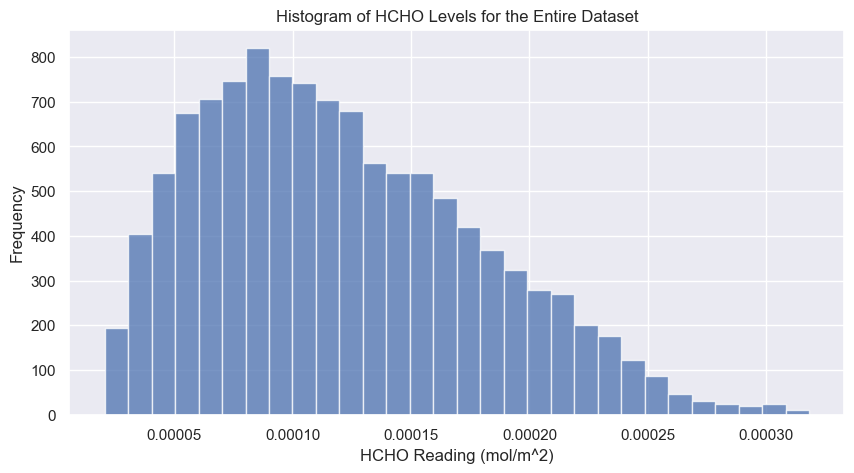

 Descriptive statistics of the Colombo Proper dataframe 
Mean HCHO Levels For The Entire Time Period : 0.00015735347 mol/m^2
Median HCHO Levels For The Entire Time Period : 0.00014984294 mol/m^2
Standard Deviation of HCHO Levels For The Entire Time Period : 6.6573596e-05 mol/m^2



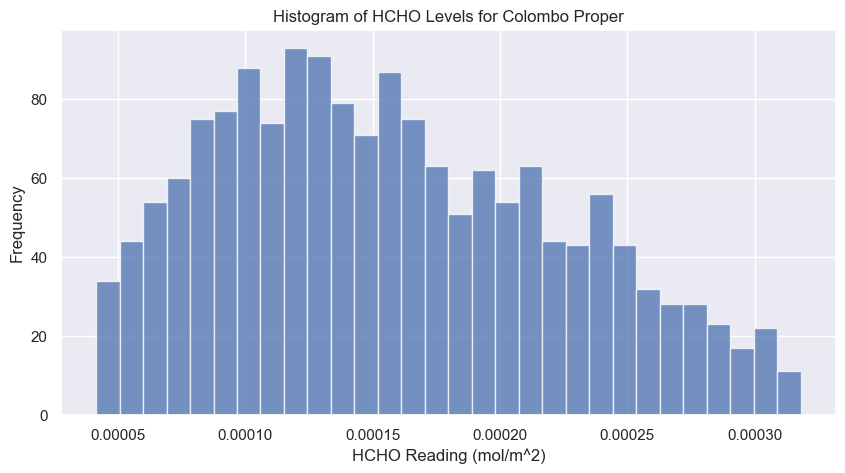

 Descriptive statistics of the Deniyaya, Matara dataframe 
Mean HCHO Levels For The Entire Time Period : 0.000103122878 mol/m^2
Median HCHO Levels For The Entire Time Period : 9.4623636e-05 mol/m^2
Standard Deviation of HCHO Levels For The Entire Time Period : 5.125393e-05 mol/m^2



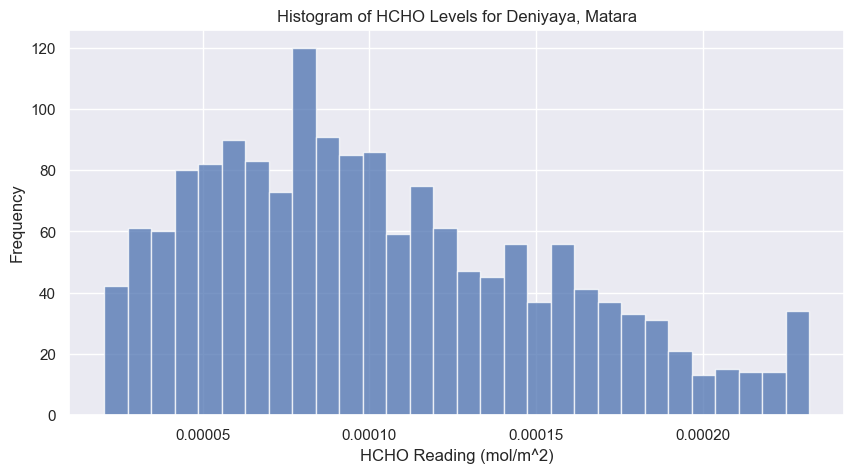

 Descriptive statistics of the Nuwara Eliya Proper dataframe 
Mean HCHO Levels For The Entire Time Period : 9.9598168e-05 mol/m^2
Median HCHO Levels For The Entire Time Period : 9.3445838e-05 mol/m^2
Standard Deviation of HCHO Levels For The Entire Time Period : 4.8426637e-05 mol/m^2



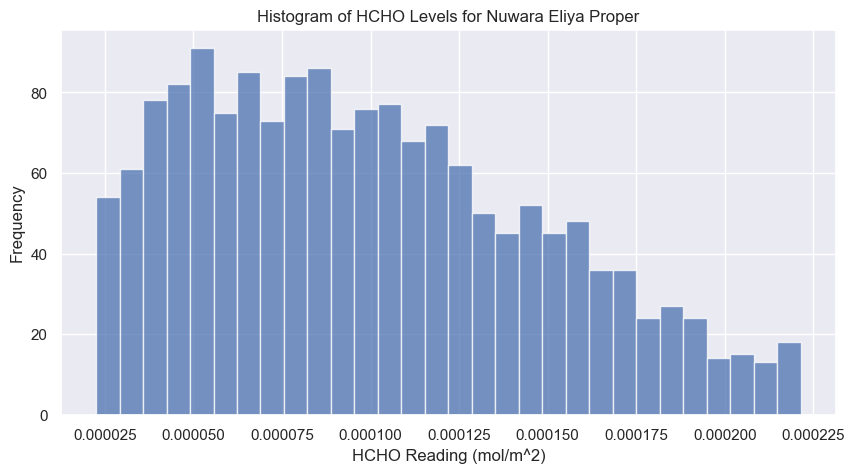

 Descriptive statistics of the Bibile, Monaragala dataframe 
Mean HCHO Levels For The Entire Time Period : 0.000128502602 mol/m^2
Median HCHO Levels For The Entire Time Period : 0.000124048353 mol/m^2
Standard Deviation of HCHO Levels For The Entire Time Period : 5.8184936e-05 mol/m^2



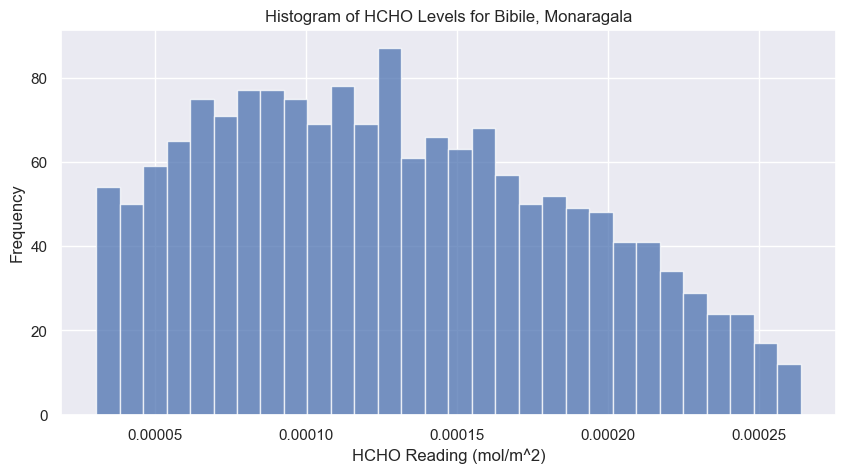

 Descriptive statistics of the Kurunegala Proper dataframe 
Mean HCHO Levels For The Entire Time Period : 0.000131606334 mol/m^2
Median HCHO Levels For The Entire Time Period : 0.000123630596 mol/m^2
Standard Deviation of HCHO Levels For The Entire Time Period : 5.4682926e-05 mol/m^2



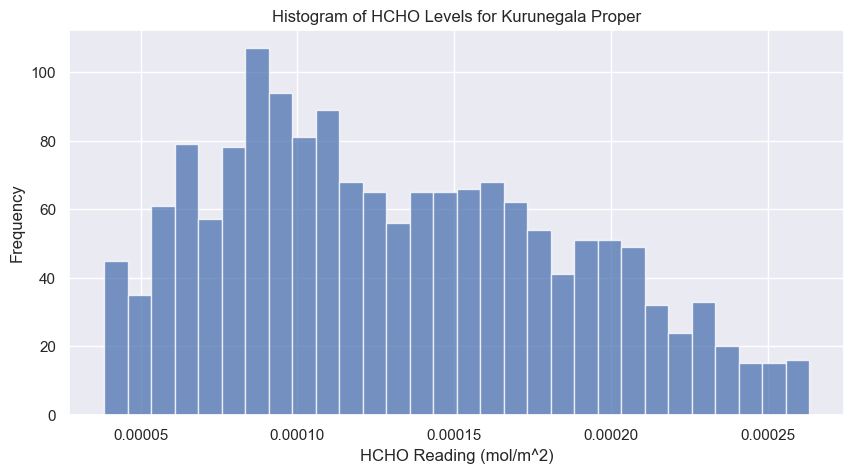

 Descriptive statistics of the Jaffna Proper dataframe 
Mean HCHO Levels For The Entire Time Period : 0.000109078151 mol/m^2
Median HCHO Levels For The Entire Time Period : 0.000103050519 mol/m^2
Standard Deviation of HCHO Levels For The Entire Time Period : 4.8911334e-05 mol/m^2



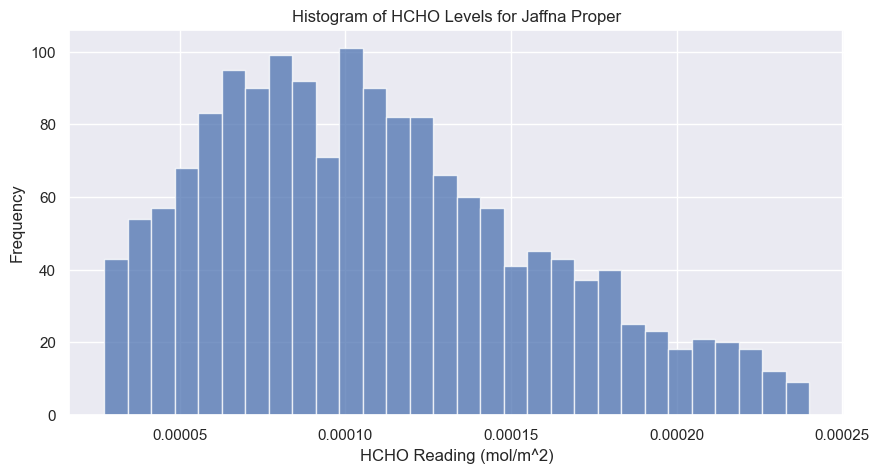

 Descriptive statistics of the Kandy Proper dataframe 
Mean HCHO Levels For The Entire Time Period : 0.000114252121 mol/m^2
Median HCHO Levels For The Entire Time Period : 0.0001082788 mol/m^2
Standard Deviation of HCHO Levels For The Entire Time Period : 5.3619527e-05 mol/m^2



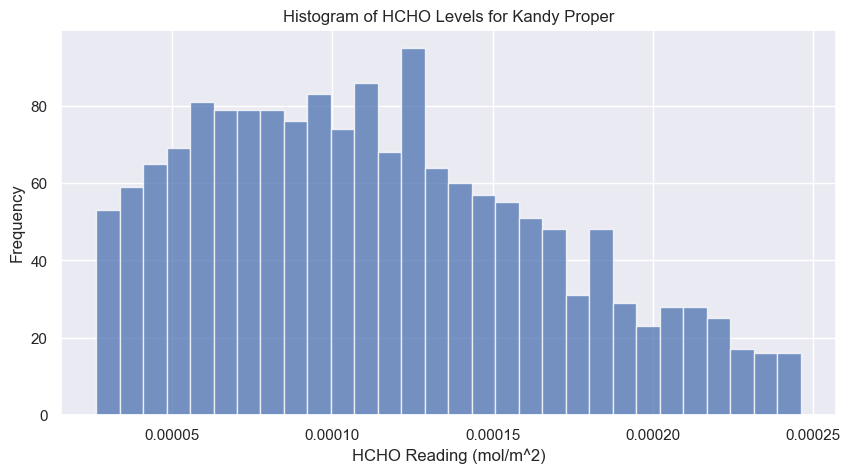

In [656]:
# Displaying island-wide statistics
print(BLUE, "Descriptive statistics of the entire dataset", RESET)
print("Mean HCHO Levels For The Entire Time Period :", round(combined_df["HCHO_reading"].mean(), 12), "mol/m^2")
print("Median HCHO Levels For The Entire Time Period :", round(combined_df["HCHO_reading"].median(), 12), "mol/m^2")
print("Standard Deviation of HCHO Levels For The Entire Time Period :", round(combined_df["HCHO_reading"].std(), 12), "mol/m^2")
print("")

# Histogram for the combined dataset
plt.figure(figsize=(10, 5))
plt.hist(combined_df["HCHO_reading"], bins=30, alpha=0.75)
plt.title('Histogram of HCHO Levels for the Entire Dataset')
plt.xlabel('HCHO Reading (mol/m^2)')
plt.ylabel('Frequency')
plt.show()

# Displaying and plotting district-wise statistics
for dataframe in df_list:
    district_name = dataframe.iloc[0, 1]
    print(BLUE, "Descriptive statistics of the", district_name, "dataframe", RESET)
    print("Mean HCHO Levels For The Entire Time Period :", round(dataframe["HCHO_reading"].mean(), 12), "mol/m^2")
    print("Median HCHO Levels For The Entire Time Period :", round(dataframe["HCHO_reading"].median(), 12), "mol/m^2")
    print("Standard Deviation of HCHO Levels For The Entire Time Period :", round(dataframe["HCHO_reading"].std(), 12), "mol/m^2")
    print("")

    # Histogram for each district dataframe
    plt.figure(figsize=(10, 5))
    plt.hist(dataframe["HCHO_reading"], bins=30, alpha=0.75)
    plt.title(f'Histogram of HCHO Levels for {district_name}')
    plt.xlabel('HCHO Reading (mol/m^2)')
    plt.ylabel('Frequency')
    plt.show()


In [657]:
combined_df.to_csv("Datasets/dependant_variables.csv", index=False)